# Exploratory Data Analysis

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud

In [4]:
file_path = r"E:\My Drive\Indonesia AI\Fundamental NLP\Project 1\Data_raw\tweet.csv"
df = pd.read_csv(file_path)

In [5]:
print('5 Baris Data Pertama')
print(df.head(10))
print('\n', '-'*70)

print('Informasi Dataset')
print(df.info())

5 Baris Data Pertama
   Unnamed: 0 sentimen                                              tweet
0           0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...
1           1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2           2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....
3           3  positif  Bagi Sumatera Selatan, Asian Games berdampak p...
4           4  negatif  Negara kita ngutang buat bngun infrastruktur y...
5           5   netral  Yg bisikin pak jokowi, cm mikirin perputaran d...
6           6  positif  Masa tenang msih ngoceh aja..ttp jokowi harga ...
7           7  positif  #UASdifitnahKejiBalasDiTPS   kerjasa ekonomi b...
8           8   netral  Iya bener Aa, kita MANTAP kan pilihan ke Pemim...
9           9  negatif  Prabowo-Sandi Sepakat Tak Ambil Gaji karena Ne...

 ----------------------------------------------------------------------
Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814


In [6]:
# Menghitung jumlah masing-masing sentimen
sentiment_counts = df['sentimen'].value_counts()
print('Jumlah Tweet per Sentimen: ')
print(sentiment_counts)

Jumlah Tweet per Sentimen: 
sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64


C:\Users\arjun\AppData\Local\Temp\ipykernel_2344\849886060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


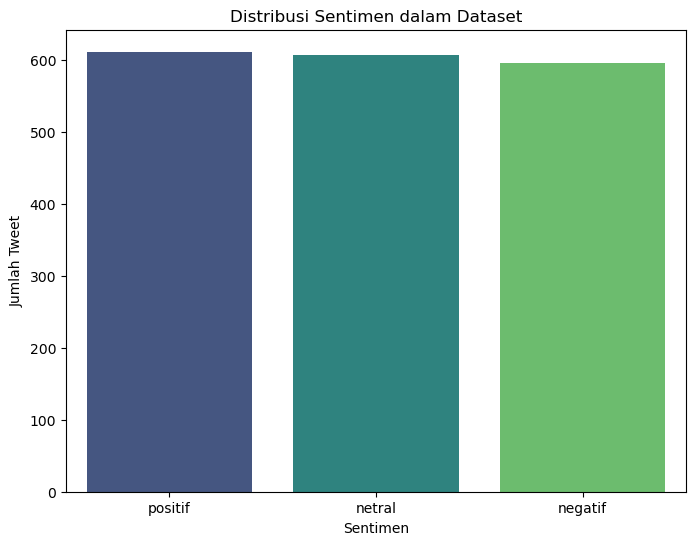

In [7]:
# Membuat visualisasi dengan bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribusi Sentimen dalam Dataset')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

count    1815.000000
mean      194.669972
std        75.533506
min        27.000000
25%       134.000000
50%       200.000000
75%       258.000000
max       668.000000
Name: panjang_tweet, dtype: float64


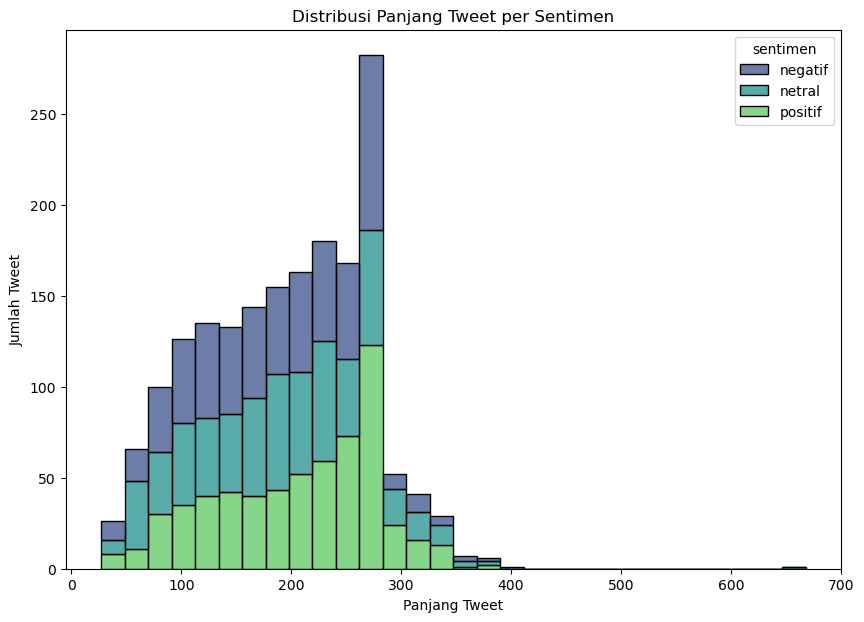

In [8]:
# Membuat kolom baru untuk menyimpan panjang setiap tweet
df['panjang_tweet'] = df['tweet'].str.len()

# Melihat statistik deskriptif dari panjang tweet
print(df['panjang_tweet'].describe())

# Visualisasi distribusi panjang tweet untuk setiap sentimen
plt.figure(figsize=(10,7))
sns.histplot(data=df, x='panjang_tweet', hue='sentimen', multiple='stack', palette='viridis', bins=30)
plt.title('Distribusi Panjang Tweet per Sentimen')
plt.xlabel('Panjang Tweet')
plt.ylabel('Jumlah Tweet')
plt.show()

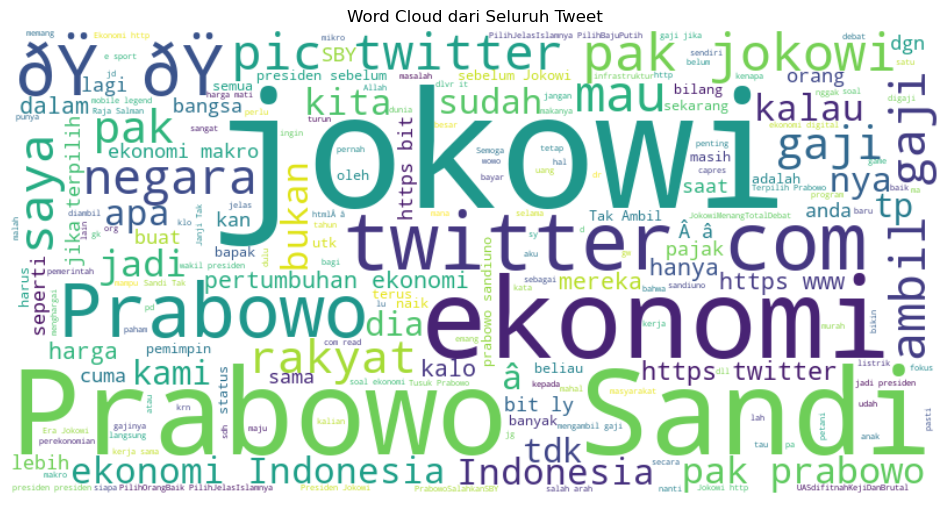

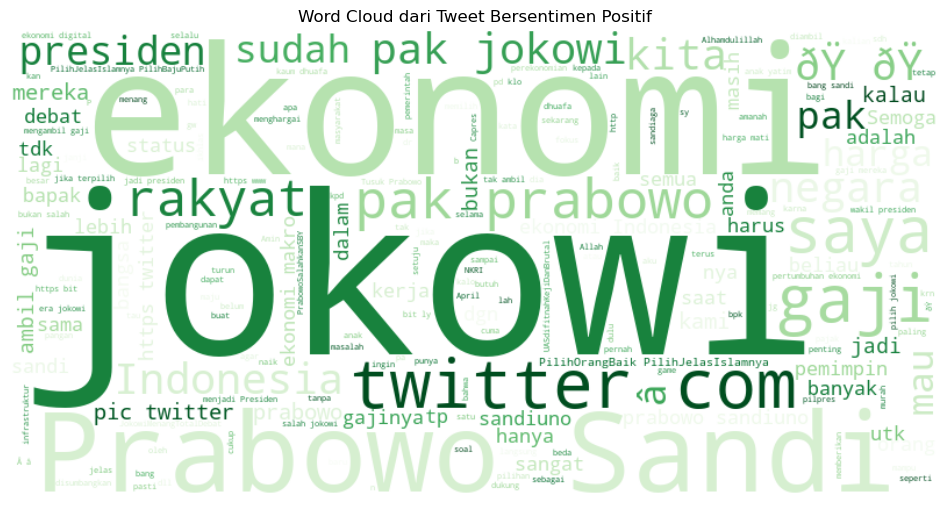

In [9]:
all_tweets_text = ' '.join(df['tweet'])

# Daftar stopwords Bahasa Indonesia (ini hanya contoh, bisa ditambahkan)
# Stopwords adalah kata umum yang sering muncul tapi tidak punya makna khusus
stopwords_indonesia = set([
    'di', 'ke', 'dari', 'dan', 'ini', 'itu', 'yang', 'untuk', 'dengan',
    'saja', 'tidak', 'tapi', 'ada', 'bisa', 'karena', 'yg', 'gak', 'ga',
    'aja', 'juga', 'akan', 'ke', 'pada', 'sih', 'kok', 'deh', 'ya'
])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords_indonesia,
                      colormap='viridis').generate(all_tweets_text)

# Menampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Menghilangkan sumbu x dan y
plt.title('Word Cloud dari Seluruh Tweet')
plt.show()


# c. Membuat Word Cloud untuk Sentimen Positif (sebagai contoh)
# Anda bisa ulangi proses ini untuk 'negatif' dan 'netral'
positif_tweets_text = ' '.join(df[df['sentimen'] == 'positif']['tweet'])

wordcloud_positif = WordCloud(width=800, height=400,
                              background_color='white',
                              stopwords=stopwords_indonesia,
                              colormap='Greens').generate(positif_tweets_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Tweet Bersentimen Positif')
plt.show()

--- 5 Hashtag Paling Sering Muncul ---
#PrabowoSalahkanSBY: 90 kali
#PilihOrangBaik: 61 kali
#PilihBajuPutih: 60 kali
#JokowiMenangTotalDebat: 55 kali
#PilihJelasIslamnya: 55 kali


--- 5 Akun yang Paling Sering di-Mention ---
@jokowi: 233 kali
@prabowo: 148 kali
@sandiuno: 108 kali
@Jokowi: 18 kali
@KHMarufAmin_: 13 kali


--- Rata-rata Tanda Seru dan Tanya per Sentimen ---
          jumlah_seru  jumlah_tanya
sentimen                           
negatif          0.25          0.61
netral           0.05          0.20
positif          0.16          0.16




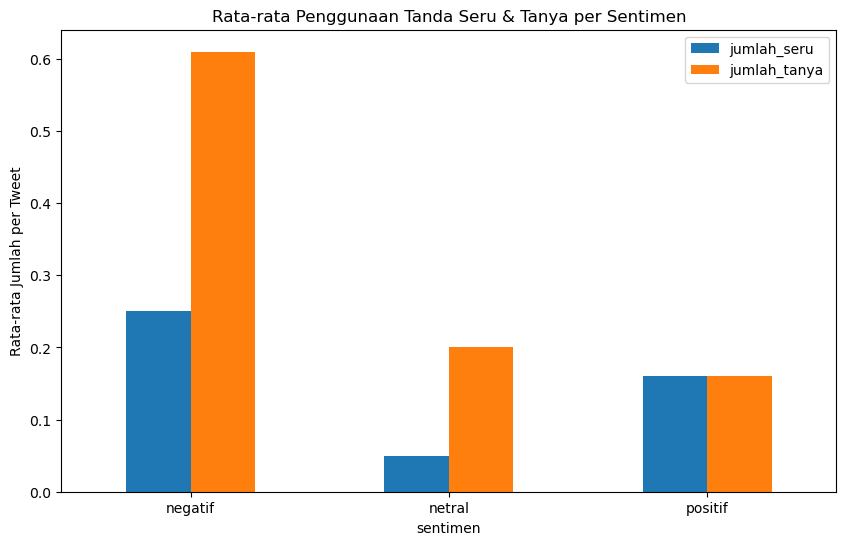



--- 5 Kata Kapital Paling Sering Muncul ---
SBY: 56 kali
TPS: 29 kali
NKRI: 29 kali
RI: 28 kali
PRABOWO: 26 kali


In [10]:
# --- 1. Ekstraksi dan Analisis Hashtag (#) ---

# Fungsi untuk mengekstrak hashtag dari teks
def find_hashtags(tweet):
    return re.findall(r"#(\w+)", tweet)

# Terapkan fungsi ke kolom tweet untuk membuat kolom baru berisi list hashtag
df['hashtags'] = df['tweet'].apply(find_hashtags)

# Kumpulkan semua hashtag dari seluruh dataset ke dalam satu list
all_hashtags = [item for sublist in df['hashtags'] for item in sublist]

# Hitung 5 hashtag yang paling sering muncul
top_5_hashtags = Counter(all_hashtags).most_common(5)

print("--- 5 Hashtag Paling Sering Muncul ---")
for tag, count in top_5_hashtags:
    print(f"#{tag}: {count} kali")
print("\n" + "="*50 + "\n")


# --- 2. Ekstraksi dan Analisis Mention (@) ---

# Fungsi untuk mengekstrak mention dari teks
def find_mentions(tweet):
    return re.findall(r"@(\w+)", tweet)

# Terapkan fungsi ke kolom tweet
df['mentions'] = df['tweet'].apply(find_mentions)

# Kumpulkan semua mention ke dalam satu list
all_mentions = [item for sublist in df['mentions'] for item in sublist]

# Hitung 5 mention yang paling sering muncul
top_5_mentions = Counter(all_mentions).most_common(5)

print("--- 5 Akun yang Paling Sering di-Mention ---")
for user, count in top_5_mentions:
    print(f"@{user}: {count} kali")
print("\n" + "="*50 + "\n")


# --- 3. Analisis Tanda Seru (!) dan Tanda Tanya (?) ---

# Buat kolom baru untuk menghitung jumlah tanda seru dan tanya
df['jumlah_seru'] = df['tweet'].str.count(r'!')
df['jumlah_tanya'] = df['tweet'].str.count(r'\?')

print("--- Rata-rata Tanda Seru dan Tanya per Sentimen ---")
# Kita kelompokkan berdasarkan sentimen dan hitung rata-rata penggunaannya
# Ini akan menguji hipotesis Anda apakah tanda baca ini menandakan sentimen tertentu
punctuation_analysis = df.groupby('sentimen')[['jumlah_seru', 'jumlah_tanya']].mean().round(2)
print(punctuation_analysis)
print("\n")

# Visualisasi untuk perbandingan yang lebih jelas
punctuation_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Penggunaan Tanda Seru & Tanya per Sentimen')
plt.ylabel('Rata-rata Jumlah per Tweet')
plt.xticks(rotation=0)
plt.show()
print("\n" + "="*50 + "\n")


# --- 4. Analisis Kata Uppercase (HURUF KAPITAL) ---

# Fungsi untuk menemukan kata-kata yang ditulis full kapital (minimal 2 huruf)
def find_uppercase_words(tweet):
    return re.findall(r'\b[A-Z]{2,}\b', tweet)

# Terapkan fungsi
df['uppercase_words'] = df['tweet'].apply(find_uppercase_words)

# Kumpulkan semua kata kapital ke dalam satu list
all_uppercase = [item for sublist in df['uppercase_words'] for item in sublist]

# Hitung 5 kata kapital yang paling sering muncul
top_5_uppercase = Counter(all_uppercase).most_common(5)

print("--- 5 Kata Kapital Paling Sering Muncul ---")
for word, count in top_5_uppercase:
    print(f"{word}: {count} kali")

In [12]:
def find_hashtags(tweet):
    return re.findall(r"#(\w+)", tweet)
def find_mentions(tweet):
    return re.findall(r"@(\w+)", tweet)
def find_uppercase_words(tweet):
    return re.findall(r'\b[A-Z]{2,}\b', tweet)

df = pd.read_csv(r"E:\My Drive\Indonesia AI\Fundamental NLP\Project 1\Data_raw\tweet.csv")
df['hashtags'] = df['tweet'].apply(find_hashtags)
df['mentions'] = df['tweet'].apply(find_mentions)
df['uppercase_words'] = df['tweet'].apply(find_uppercase_words)
# -------------------------------------------------------------------


# Buat DataFrame terpisah untuk setiap sentimen
df_positif = df[df['sentimen'] == 'positif']
df_negatif = df[df['sentimen'] == 'negatif']
df_netral = df[df['sentimen'] == 'netral']

# Fungsi untuk mengumpulkan, menghitung, dan menampilkan 5 teratas
def print_top_5(dataframe, feature_column, title):
    print(f"--- {title} ---")

    # Kumpulkan semua item dari kolom fitur ke dalam satu list
    all_items = [item for sublist in dataframe[feature_column] for item in sublist]

    # Jika tidak ada item, beri pesan
    if not all_items:
        print("Tidak ditemukan.")
        print("\n")
        return

    # Hitung 5 item yang paling sering muncul
    top_5_items = Counter(all_items).most_common(5)

    # Tampilkan hasilnya
    for item, count in top_5_items:
        prefix = '#' if feature_column == 'hashtags' else '@' if feature_column == 'mentions' else ''
        print(f"{prefix}{item}: {count} kali")
    print("\n")

# --- 1. Analisis Hashtag per Sentimen ---
print_top_5(df_positif, 'hashtags', 'Top 5 Hashtag di Tweet POSITIF')
print_top_5(df_negatif, 'hashtags', 'Top 5 Hashtag di Tweet NEGATIF')
print_top_5(df_netral, 'hashtags', 'Top 5 Hashtag di Tweet NETRAL')
print("="*50 + "\n")

# --- 2. Analisis Mention per Sentimen ---
print_top_5(df_positif, 'mentions', 'Top 5 Mention di Tweet POSITIF')
print_top_5(df_negatif, 'mentions', 'Top 5 Mention di Tweet NEGATIF')
print_top_5(df_netral, 'mentions', 'Top 5 Mention di Tweet NETRAL')
print("="*50 + "\n")

# --- 3. Analisis Kata Kapital per Sentimen ---
print_top_5(df_positif, 'uppercase_words', 'Top 5 Kata Kapital di Tweet POSITIF')
print_top_5(df_negatif, 'uppercase_words', 'Top 5 Kata Kapital di Tweet NEGATIF')
print_top_5(df_netral, 'uppercase_words', 'Top 5 Kata Kapital di Tweet NETRAL')


--- Top 5 Hashtag di Tweet POSITIF ---
#PilihOrangBaik: 32 kali
#PilihBajuPutih: 29 kali
#PilihJelasIslamnya: 27 kali
#JokowiMenangTotalDebat: 24 kali
#PrabowoSalahkanSBY: 20 kali


--- Top 5 Hashtag di Tweet NEGATIF ---
#PrabowoSalahkanSBY: 35 kali
#UASdifitnahKejiDanBrutal: 14 kali
#JokowiMenangTotalDebat: 8 kali
#bukansalahbapak: 7 kali
#TusukPrabowoSandi: 6 kali


--- Top 5 Hashtag di Tweet NETRAL ---
#PrabowoSalahkanSBY: 35 kali
#PilihBajuPutih: 31 kali
#PilihOrangBaik: 29 kali
#PilihJelasIslamnya: 28 kali
#JokowiMenangTotalDebat: 23 kali



--- Top 5 Mention di Tweet POSITIF ---
@prabowo: 81 kali
@jokowi: 80 kali
@sandiuno: 69 kali
@Jokowi: 9 kali
@SBYudhoyono: 5 kali


--- Top 5 Mention di Tweet NEGATIF ---
@jokowi: 72 kali
@prabowo: 35 kali
@sandiuno: 20 kali
@Fahrihamzah: 4 kali
@bocahsosmed: 4 kali


--- Top 5 Mention di Tweet NETRAL ---
@jokowi: 81 kali
@prabowo: 32 kali
@sandiuno: 19 kali
@KHMarufAmin_: 9 kali
@Jokowi: 6 kali



--- Top 5 Kata Kapital di Tweet POSITIF ---
N

C:\Users\arjun\AppData\Local\Temp\ipykernel_2344\1286825565.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{prefix}{lab}" for lab in plot_df['item']])
C:\Users\arjun\AppData\Local\Temp\ipykernel_2344\1286825565.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{prefix}{lab}" for lab in plot_df['item']])
C:\Users\arjun\AppData\Local\Temp\ipykernel_2344\1286825565.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{prefix}{lab}" for lab in plot_df['item']])
C:\Users\arjun\AppData\Local\Temp\ipykernel_2344\1286825565.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_ytickla

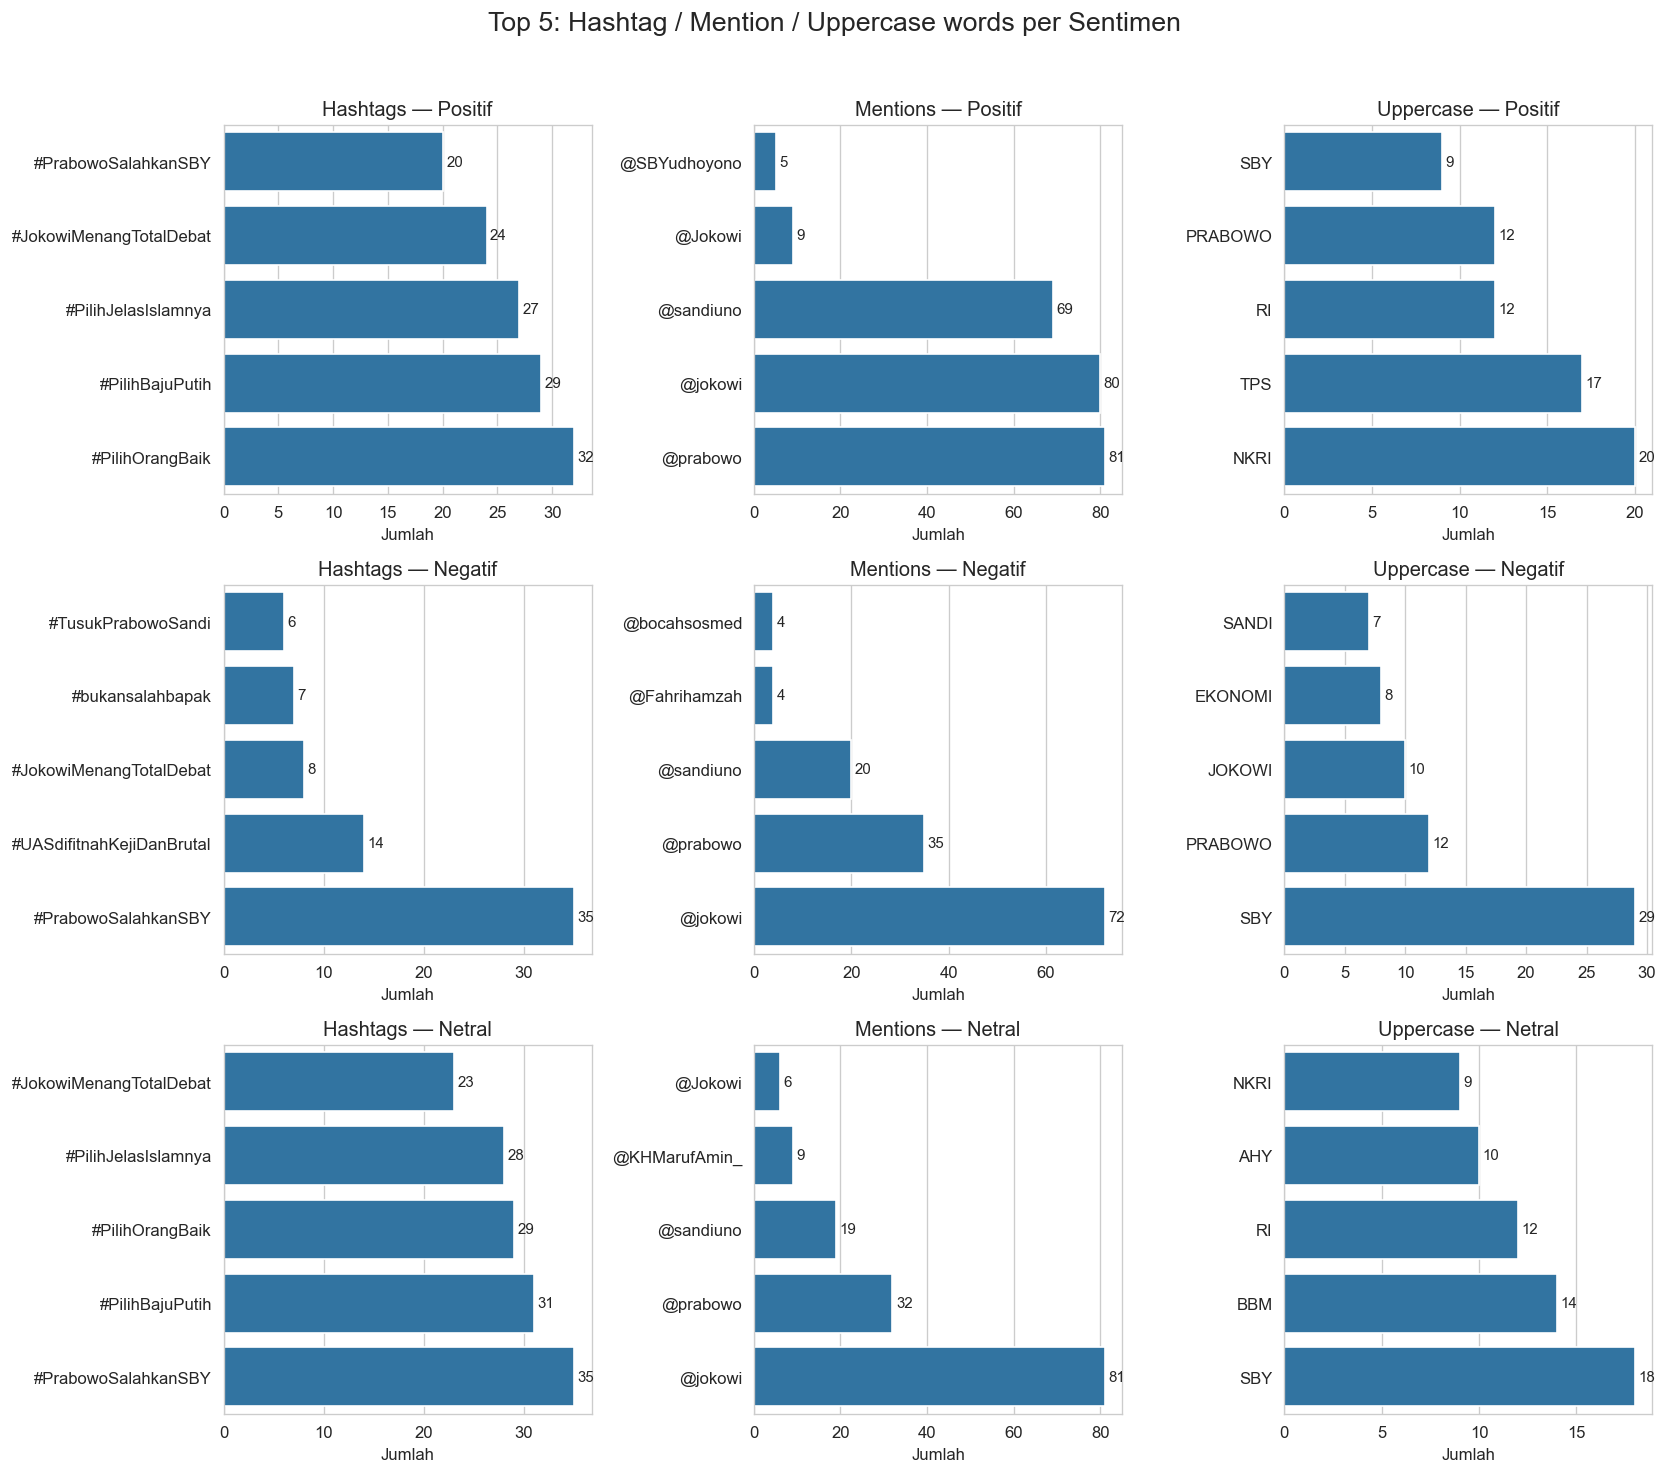

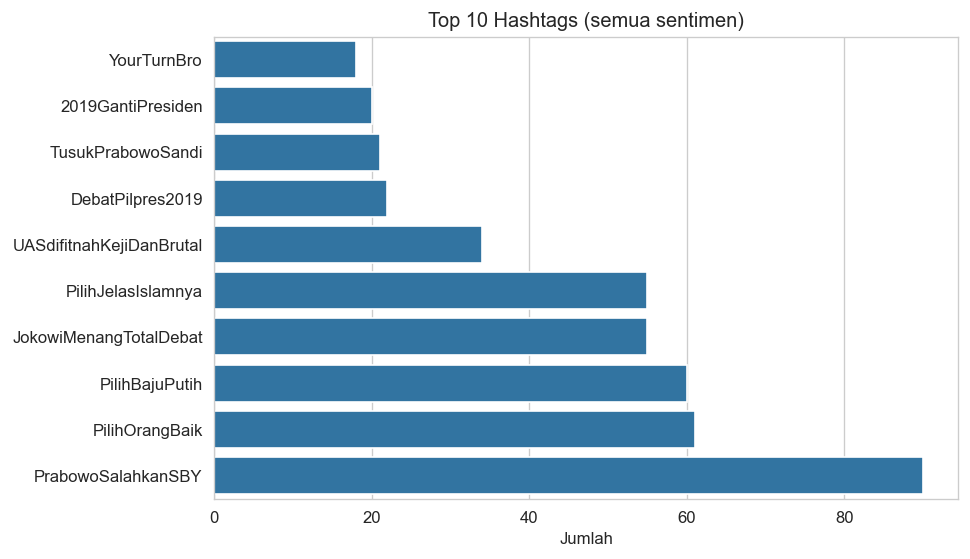

In [14]:
# Visualisasi top hashtags / mentions / uppercase words per sentimen
# Pastikan kamu sudah menjalankan kode ekstraksi hashtag/mention/uppercase sebelumnya
# atau ubah path CSV pada bagian baca file jika perlu.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import os

# Jika df belum terdefinisi (mis. kernel baru), baca file:
if 'df' not in globals():
    path = r"E:\My Drive\Indonesia AI\Fundamental NLP\Project 1\Data_raw\tweet.csv"
    if os.path.exists(path):
        df = pd.read_csv(path)
        # jika kolom belum diproses ulang, jalankan fungsi ekstraksi singkat:
        import re
        def find_hashtags(tweet): return re.findall(r"#(\w+)", str(tweet))
        def find_mentions(tweet): return re.findall(r"@(\w+)", str(tweet))
        def find_uppercase_words(tweet): return re.findall(r'\b[A-Z]{2,}\b', str(tweet))
        df['hashtags'] = df['tweet'].apply(find_hashtags)
        df['mentions'] = df['tweet'].apply(find_mentions)
        df['uppercase_words'] = df['tweet'].apply(find_uppercase_words)
    else:
        raise FileNotFoundError(f"CSV tidak ditemukan di {path}. Jika df sudah ada, abaikan bagian ini.")

# Pastikan label sentimen konsisten (lowercase)
df['sentimen'] = df['sentimen'].astype(str).str.lower()

# Helper: ambil top-n item dari kolom list
def top_n_from_column(df_subset, col, n=5):
    all_items = [it for sub in df_subset[col] for it in sub]
    if not all_items:
        return [], []
    c = Counter(all_items)
    items, counts = zip(*c.most_common(n))
    return list(items), list(counts)

# Visualisasi grid 3x3: bar horizontal untuk tiap sentimen x fitur
sentiments = ['positif', 'negatif', 'netral']
features = [
    ('hashtags', '#'),
    ('mentions', '@'),
    ('uppercase_words', '')  # no prefix
]

sns.set_style("whitegrid")
plt.rcParams.update({'figure.dpi': 120})

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12), constrained_layout=True)

for i, sent in enumerate(sentiments):
    df_sub = df[df['sentimen'] == sent]
    for j, (col, prefix) in enumerate(features):
        ax = axes[i, j]
        items, counts = top_n_from_column(df_sub, col, n=5)
        if len(items) == 0:
            ax.text(0.5, 0.5, "Tidak ditemukan", ha='center', va='center', fontsize=12)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            # buat dataframe kecil untuk plotting
            plot_df = pd.DataFrame({ 'item': items, 'count': counts })
            # invert order supaya terbesar di atas
            plot_df = plot_df.iloc[::-1]
            sns.barplot(x='count', y='item', data=plot_df, ax=ax, orient='h')
            # tambahkan label angka di ujung bar
            for p in ax.patches:
                width = p.get_width()
                ax.text(width + max(counts)*0.01, p.get_y() + p.get_height()/2,
                        f'{int(width)}', va='center', fontsize=9)
            # tambahkan prefix ke label y-axis
            ax.set_yticklabels([f"{prefix}{lab}" for lab in plot_df['item']])
        # title per subplot
        col_title = "Hashtags" if col == 'hashtags' else ("Mentions" if col == 'mentions' else "Uppercase")
        ax.set_title(f"{col_title} — {sent.capitalize()}")
        ax.set_xlabel('Jumlah')
        ax.set_ylabel('')

# Overall title
fig.suptitle("Top 5: Hashtag / Mention / Uppercase words per Sentimen", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# ------ tambahan: chart gabungan (top hashtags di semua sentimen) ------
# Top 10 hashtags keseluruhan
all_hashtags = [h for sub in df['hashtags'] for h in sub]
if all_hashtags:
    c = Counter(all_hashtags).most_common(10)
    items, counts = zip(*c)
    plt.figure(figsize=(8,5))
    sns.barplot(x=list(counts)[::-1], y=list(items)[::-1], orient='h')
    plt.title("Top 10 Hashtags (semua sentimen)")
    plt.xlabel("Jumlah")
    plt.ylabel("")
    plt.show()
